In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import statsmodels.formula.api as smf
from pandas import read_csv
import pandas as pd
from collections import Counter

from sklearn.preprocessing import StandardScaler
%matplotlib inline

train = pd.read_csv('dataset/sales_train.csv')
test = pd.read_csv('dataset/test.csv')
shops = pd.read_csv('dataset/shops.csv')
items = pd.read_csv('dataset/items.csv')
items_categories = pd.read_csv('dataset/item_categories.csv')
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [2]:
'''
scaler = StandardScaler().fit(train['item_price'].values.reshape(-1, 1))
train['item_price'] = scaler.transform(train['item_price'].values.reshape(-1, 1))
scaler = StandardScaler().fit(train['item_cnt_day'].values.reshape(-1, 1))
train['item_cnt_day'] = scaler.transform(train['item_cnt_day'].values.reshape(-1, 1))
train.describe()
'''

"\nscaler = StandardScaler().fit(train['item_price'].values.reshape(-1, 1))\ntrain['item_price'] = scaler.transform(train['item_price'].values.reshape(-1, 1))\nscaler = StandardScaler().fit(train['item_cnt_day'].values.reshape(-1, 1))\ntrain['item_cnt_day'] = scaler.transform(train['item_cnt_day'].values.reshape(-1, 1))\ntrain.describe()\n"

In [3]:
from datetime import datetime

#find missing date
def datekey(item):
    date, _ = item
    #print(date)
    d, m, y = date.split('.')
    #print(y+m+d)
    return y+m+d

def getdatelist(beginDate, endDate):
    date_l=[datetime.strftime(x,'%d.%m.%Y') for x in list(pd.date_range(start=beginDate, end=endDate))]
    return date_l

datelist = Counter(train['date'])
datelist = sorted(datelist.items(), key=datekey)
print(len(datelist))
#01.01.2013 - 31.10.2015

fulldatelist = getdatelist('20130101', '20151031')
print(len(fulldatelist))

1034
1034


Counter({1.0: 2163, 2.0: 136, 3.0: 20, -1.0: 3, 4.0: 2, 17.0: 1})


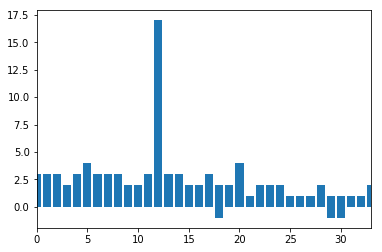

In [4]:
def bar_sale_item(data, itemid):
    selected_data = data[data.item_id==itemid]
    selected_item_cnt_day = selected_data['item_cnt_day']
    print(Counter(selected_item_cnt_day))
    plt.xlim((0,33))
    plt.bar(selected_data['date_block_num'], selected_data['item_cnt_day'])
    return

#Counter(train['date_block_num']) #34months
bar_sale_item(train, 2574)

1562733.0
1320889.0
764584.0


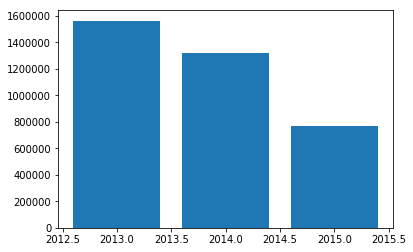

In [17]:
def sale_year(data):
    data['year'] = data['date'].str.split('.').str[2]
    total_sale = []
    for i in range(2013, 2016):
        selected_data = data[data.year==str(i)]
        print(sum(selected_data['item_cnt_day']))
        total_sale.append(sum(selected_data['item_cnt_day']))
    plt.bar(range(2013,2016), total_sale)
    return

sale_year(train)